In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pickle

In [2]:
from data_helper import file_list, data_folder, cv_folder

print(data_folder)
print(file_list)

/Users/AnhVu/Study/PhD/athanh/gcEnsemble/gcEnsemble_code_final_Add_original_features/data/
['australian', 'balance']


In [3]:
i_file = 1

In [4]:
file_name = file_list[i_file]
print(datetime.datetime.now(),' File {}: '.format(i_file), file_name)

'''-------------------------Data Loader -----------------------'''
D_train = np.loadtxt(data_folder + '/train1/' + file_name + '_train1.dat', delimiter=',')
D_val = np.loadtxt(data_folder + '/val/' + file_name + '_val.dat', delimiter=',')
D_test = np.loadtxt(data_folder + '/test/' + file_name + '_test.dat', delimiter=',')

X_train_original = np.concatenate((D_train, D_val), axis=0)
X_test_original = D_test

2020-05-06 22:10:30.656703  File 1:  balance


In [5]:
n_additions = 50
metadata_folder = "/Users/AnhVu/Study/PhD/athanh/CNN_Combining_Method/CNN-Combining-Algorithm/Meta_data"
metadata_file = metadata_folder + '/{}/Data_Augmentation/Fact/{}'.format(file_name, n_additions)
metadata_file

'/Users/AnhVu/Study/PhD/athanh/CNN_Combining_Method/CNN-Combining-Algorithm/Meta_data/balance/Data_Augmentation/Fact/50'

In [6]:
train_md = open(metadata_file + '/train_meta_data.pkl', 'rb')
lable_file = open(metadata_file + '/label_meta_data.pkl', 'rb')
train_meta_data = pickle.load(train_md)
label_meta_data = pickle.load(lable_file)

In [7]:
num_samples = train_meta_data.shape[0]
num_classifiers = train_meta_data.shape[1]
num_classes = train_meta_data.shape[2]

In [8]:
train_meta_data.shape

(487, 5, 3)

In [9]:
train_md = train_meta_data.reshape(num_samples, num_classifiers*num_classes)
train_md

array([[2.58180199e-01, 1.13974991e-01, 6.27844810e-01, ...,
        1.84626598e-02, 8.03812742e-01, 1.77724585e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.42692910e-01, 1.07017967e-01, 6.50289124e-01],
       [2.01989025e-01, 1.56692609e-01, 6.41318366e-01, ...,
        1.60000000e-01, 1.70000000e-01, 6.70000000e-01],
       ...,
       [9.99937177e-01, 4.97594701e-05, 1.30889794e-05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.75544465e-01, 1.75088912e-01, 4.93665673e-02, ...,
        8.15000000e-01, 8.50000000e-02, 1.00000000e-01],
       [7.23568916e-01, 3.79412062e-02, 2.38489851e-01, ...,
        4.30000000e-01, 2.15000000e-01, 3.55000000e-01]])

In [10]:
random_position = np.random.randint(10, size=(2))
random_position

array([7, 6])

In [11]:
selection_columns = train_md[:, random_position]
col_0 = selection_columns[:,0]
col_1 = selection_columns[:,1]

Text(0, 0.5, 'col_1')

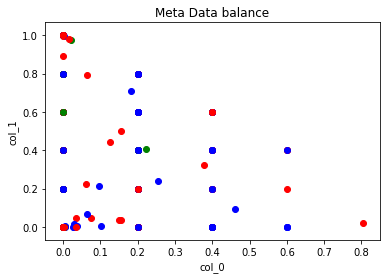

In [12]:
colors = {'1':'r', '2':'g', '3':'b'}
fig, ax = plt.subplots()
for i in range(len(label_meta_data)):
    ax.scatter(col_0[i], col_1[i], color = colors['{}'.format(label_meta_data[i])])
# set a title and labels
ax.set_title('Meta Data {}'.format(file_name))
ax.set_xlabel('col_0')
ax.set_ylabel('col_1')